In [1]:
import random
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq

    print("installed cirq.")
from cirq.contrib.svg import SVGCircuit

installing cirq...
     |████████████████████████████████| 1.8 MB 3.9 MB/s 
     |████████████████████████████████| 577 kB 59.5 MB/s 
     |████████████████████████████████| 66 kB 4.4 MB/s 
     |████████████████████████████████| 594 kB 65.4 MB/s 
     |████████████████████████████████| 57 kB 4.8 MB/s 
     |████████████████████████████████| 120 kB 76.5 MB/s 
     |████████████████████████████████| 221 kB 60.3 MB/s 
     |████████████████████████████████| 44 kB 2.7 MB/s 
     |████████████████████████████████| 147 kB 68.9 MB/s 
     |████████████████████████████████| 229 kB 44.3 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 69 kB 5.0 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 
     |████████████████████████████████| 119 kB 53.4 MB/s 
     |████████████████████████████████| 1.6 MB 48.2 MB/s 
     |██████

In [2]:
class OneQubitShorsCode:
    def __init__(self):
        self.num_physical_qubits = 9
        self.physical_qubits = cirq.LineQubit.range(self.num_physical_qubits)

    def encode(self):
        yield cirq.Moment([cirq.CNOT(self.physical_qubits[0], self.physical_qubits[3])])
        yield cirq.Moment([cirq.CNOT(self.physical_qubits[0], self.physical_qubits[6])])
        yield cirq.Moment(
            [
                cirq.H(self.physical_qubits[0]),
                cirq.H(self.physical_qubits[3]),
                cirq.H(self.physical_qubits[6]),
            ]
        )
        yield cirq.Moment(
            [
                cirq.CNOT(self.physical_qubits[0], self.physical_qubits[1]),
                cirq.CNOT(self.physical_qubits[3], self.physical_qubits[4]),
                cirq.CNOT(self.physical_qubits[6], self.physical_qubits[7]),
            ]
        )
        yield cirq.Moment(
            [
                cirq.CNOT(self.physical_qubits[0], self.physical_qubits[2]),
                cirq.CNOT(self.physical_qubits[3], self.physical_qubits[5]),
                cirq.CNOT(self.physical_qubits[6], self.physical_qubits[8]),
            ]
        )

    def apply_gate(self, gate: cirq.Gate, pos: int):
        if pos > self.num_physical_qubits:
            raise IndexError
        else:
            return gate(self.physical_qubits[pos])

    def correct(self):
        yield cirq.Moment(
            [
                cirq.CNOT(self.physical_qubits[0], self.physical_qubits[1]),
                cirq.CNOT(self.physical_qubits[3], self.physical_qubits[4]),
                cirq.CNOT(self.physical_qubits[6], self.physical_qubits[7]),
            ]
        )
        yield cirq.Moment(
            [
                cirq.CNOT(self.physical_qubits[0], self.physical_qubits[2]),
                cirq.CNOT(self.physical_qubits[3], self.physical_qubits[5]),
                cirq.CNOT(self.physical_qubits[6], self.physical_qubits[8]),
            ]
        )
        yield cirq.Moment(
            [
                cirq.CCNOT(
                    self.physical_qubits[1], self.physical_qubits[2], self.physical_qubits[0]
                ),
                cirq.CCNOT(
                    self.physical_qubits[4], self.physical_qubits[5], self.physical_qubits[3]
                ),
                cirq.CCNOT(
                    self.physical_qubits[7], self.physical_qubits[8], self.physical_qubits[6]
                ),
            ]
        )
        yield cirq.Moment(
            [
                cirq.H(self.physical_qubits[0]),
                cirq.H(self.physical_qubits[3]),
                cirq.H(self.physical_qubits[6]),
            ]
        )
        yield cirq.Moment([cirq.CNOT(self.physical_qubits[0], self.physical_qubits[3])])
        yield cirq.Moment([cirq.CNOT(self.physical_qubits[0], self.physical_qubits[6])])
        yield cirq.Moment(
            [cirq.CCNOT(self.physical_qubits[3], self.physical_qubits[6], self.physical_qubits[0])]
        )


In [3]:
def comp_round(num, decs = 2):
   return round(num.real, decs) + round(num.imag, decs) * 1j

Dirac state - Initial state 
 (-0.44+0.01j)|0⟩ + (-0.75-0.49j)|1⟩
((-0.44+0.01j), (-0.75-0.49j))


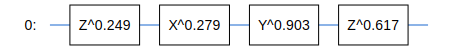

In [4]:
code = OneQubitShorsCode()

circuit = cirq.Circuit([code.apply_gate(cirq.T ** random.random(), 0), code.apply_gate(cirq.X ** random.random(), 0), code.apply_gate(cirq.Y ** random.random(), 0), code.apply_gate(cirq.Z ** random.random(), 0)])

print('Dirac state - Initial state \n',cirq.dirac_notation(circuit.final_state_vector(initial_state=0)))
fs =circuit.final_state_vector(initial_state=0)
fsn = len(fs)

initial_amps = (comp_round(sum(fs[:fsn//2]),2), comp_round(sum(fs[fsn//2:]),2))
print(initial_amps)
SVGCircuit(circuit)

Dirac state - Encoded state 
 (-0.42-0.17j)|000000000⟩ + (0.11+0.18j)|000000111⟩ + (0.11+0.18j)|000111000⟩ + (-0.42-0.17j)|000111111⟩ + (0.11+0.18j)|111000000⟩ + (-0.42-0.17j)|111000111⟩ + (-0.42-0.17j)|111111000⟩ + (0.11+0.18j)|111111111⟩


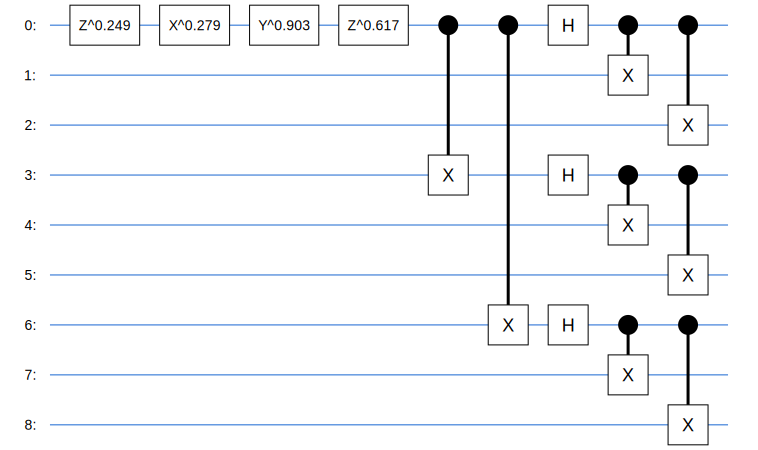

In [5]:
circuit += cirq.Circuit(code.encode())
print('Dirac state - Encoded state \n', cirq.dirac_notation(circuit.final_state_vector(initial_state=0)))
SVGCircuit(circuit)

Dirac state - After applying error 
 (-0.11-0.18j)|011000000⟩ + (0.42+0.17j)|011000111⟩ + (0.42+0.17j)|011111000⟩ + (-0.11-0.18j)|011111111⟩ + (-0.42-0.17j)|100000000⟩ + (0.11+0.18j)|100000111⟩ + (0.11+0.18j)|100111000⟩ + (-0.42-0.17j)|100111111⟩


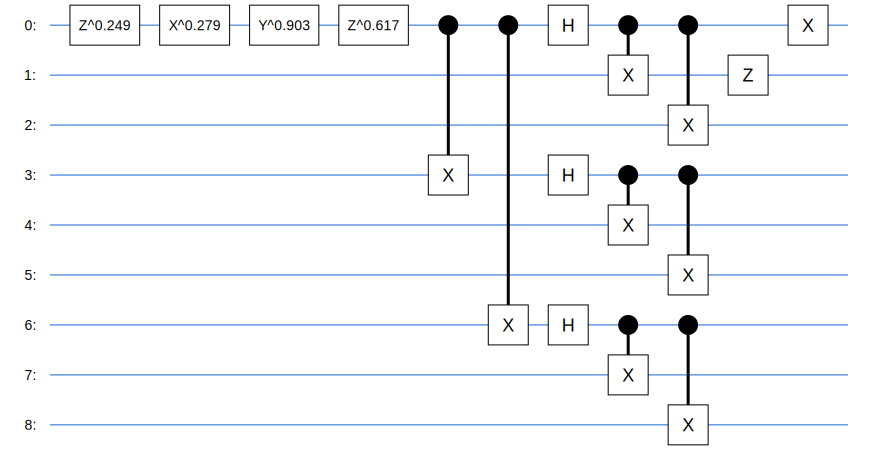

In [6]:
# create error
circuit += cirq.Circuit(
    [code.apply_gate(cirq.Z,1)]
)
circuit += cirq.Circuit(
    [code.apply_gate(cirq.X, 0)]
)
print('Dirac state - After applying error \n',cirq.dirac_notation(circuit.final_state_vector(initial_state=0)))
SVGCircuit(circuit)

Dirac state after correcting error 
 (-0.44+0.01j)|011100100⟩ + (-0.75-0.49j)|111100100⟩


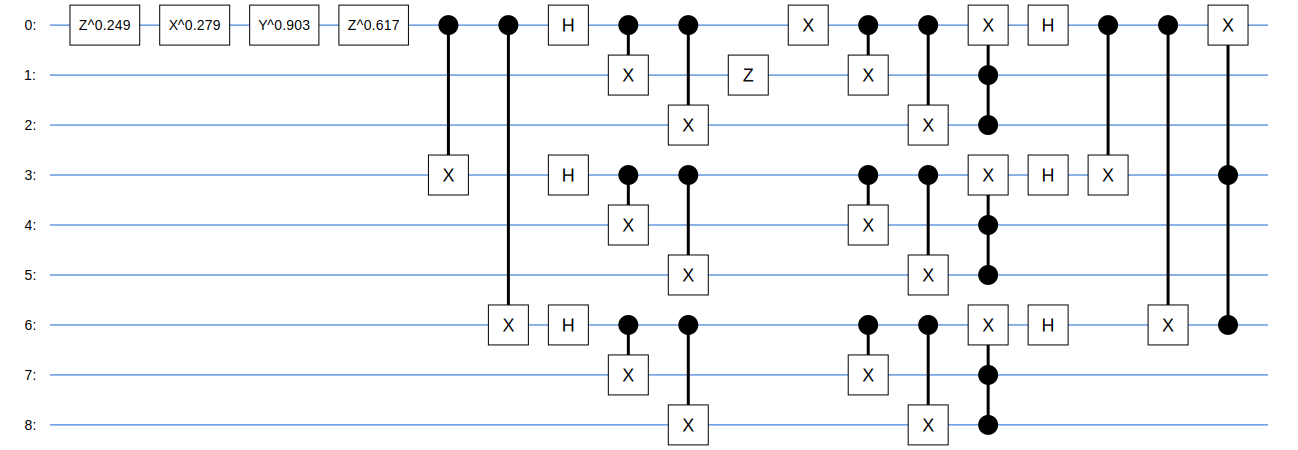

In [7]:
circuit += cirq.Circuit(code.correct())
print('Dirac state after correcting error \n',cirq.dirac_notation(circuit.final_state_vector(initial_state=0))) 
SVGCircuit(circuit)